### Support Vector Machine: 

In [1]:
# IMporting the standard libraries: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Extracting the dataset: 
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
# Defining x and y: 
x = df.iloc[:,1].values.reshape(-1,1)
y = df.iloc[:,-1].values

In [53]:
# EDA: 
df.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

In [54]:
# Checking for nan:
df.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [4]:
# As we are short on dataset, we skip the data split step: 

In [7]:
# Building the regressor: 
from sklearn.svm import SVR
regressor = SVR(gamma = 'auto')
regressor.fit(x,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

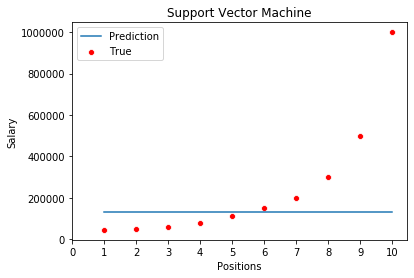

In [16]:
# Prediction and plotting: 
x_grid = np.arange(x.min(), x.max(), 0.01).reshape(-1,1)
sns.scatterplot(x.flatten(),y, color = 'red', label = 'True')
sns.lineplot(x_grid.flatten(), regressor.predict(x_grid), label = 'Prediction')
plt.title('Support Vector Machine')
plt.xticks(range(0,11))
plt.xlabel('Positions')
plt.ylabel('Salary')
plt.show()

In [18]:
# To get the right output you have to scale the dataset: 
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y= StandardScaler()

x_scaled = sc_x.fit_transform(x.reshape(-1,1))
y_scaled = sc_y.fit_transform(y.reshape(-1,1))

In [45]:
from sklearn.svm import SVR
reg_scaled = SVR(gamma = 'auto')
reg_scaled.fit(x_scaled, y_scaled.flatten())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

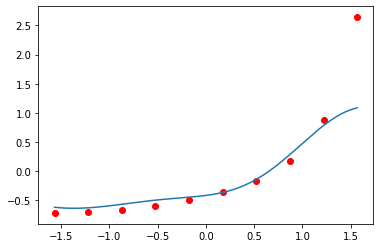

In [50]:
plt.scatter(x_scaled,y_scaled, color = 'red')
x_grid = np.arange(1, 10, 0.001)
x_grid = x_grid.reshape(-1,1)
x_grid = sc_x.transform(x_grid)
plt.plot(x_grid, reg_scaled.predict(x_grid))
plt.show()